**Problem Statement: Airbnb Hotel Booking Analysis.**

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking

**QUESTIONS**

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data

1. What are the different property types in the Dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhoods group have the highest average prices for Airbnb listings?

4. is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts by calculated host listing count?

6. Are hosts with verified identities more likely to receive positive reviews?

7. Is there a correlation between the price of a listing and its service fee?

B. What is the average review rate number (eg, stars) for listings, and does it vary based on the neighborhood group and room type?

9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

**DATA WRANGLING**

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Read the Airbnb data
df = pd.read_csv("/content/Airbnb_Open_Data.csv", encoding="utf-8-sig")


/tmp/ipython-input-989618738.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Airbnb_Open_Data.csv", encoding="utf-8-sig")


In [ ]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
#Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


**PROBLEMS IDENTIFIED WITHIN THE DATA**

A total of 541 duplicated records were found in the dataset.

The house_rules and license columns contained mostly missing values, making them insufficient for analysis.

The price and service fee columns included dollar signs and commas along with numeric values, requiring cleaning.

The currency unit (USD) was not specified in the column names for price and service fee.

Several columns contained missing values, and applying dropna() reduced the dataset significantly.

Certain columns, including price, service fee, id, host id, last review, and Construction year, were assigned incorrect data types and had to be converted.

The neighbourhood group column contained a spelling error, with “brookln” used instead of “Brooklyn.”

Outliers were identified in the availability 365 column, where some values exceeded the maximum possible of 365 days.

**CLEAN THE DATA**

Dropped 541 duplicated records to ensure uniqueness.

Removed the house_rules and license columns due to insufficient information.

Removed all dollar signs from the price and service fee columns.

Removed all commas from the price and service fee columns to keep values numeric.

Renamed the columns to price_\$ and service_fee_\$ to indicate currency.

Dropped all rows with missing values, which reduced the dataset to a single valid record.

Converted mismatched data types:

price_\$ and service_fee_\$ converted to float

id and host id converted to string

last review converted to datetime

Construction year converted to integer

Corrected the spelling of brookln to Brooklyn in the neighbourhood group column.

Removed outliers in the availability 365 column where values exceeded 365.

In [ ]:
# Drop Duplicate Records
df.drop_duplicates(inplace=True)

#Drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

# Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$','', regex=False)
df['service fee'] = df['service fee'].str.replace('$','', regex=False)

# Remove all commas from the price and service fee columns
df['price'] = df['price'].str.replace(',','', regex=False)
df['service fee'] = df['service fee'].str.replace(',','', regex=False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'}, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change all mismatched data types to the appropriate ones
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Getting rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)




In [ ]:
df.duplicated().value_counts()


,count
False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      object        
 1   NAME                            1 non-null      object        
 2   host id                         1 non-null      object        
 3   host_identity_verified          1 non-null      object        
 4   host name                       1 non-null      object        
 5   neighbourhood group             1 non-null      object        
 6   neighbourhood                   1 non-null      object        
 7   lat                             1 non-null      float64       
 8   long                            1 non-null      float64       
 9   country                         1 non-null      object        
 10  country code                    1 non-null      object        
 11  instant

**EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

**SUMMARY STATISTICS**


In [ ]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.00000,1.00000,1.0,1.0,1.0,1.0,1.0,1,1.00,1.0,1.0,1.0
mean,40.71764,-73.95689,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
min,40.71764,-73.95689,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
25%,40.71764,-73.95689,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
50%,40.71764,-73.95689,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
75%,40.71764,-73.95689,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
max,40.71764,-73.95689,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**WHAT ARE THE DIFFERENT PROPERTY TYPES IN THE DATASET**


In [ ]:
#what are the different property types in the dataset
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Private room,1


In [ ]:
print(df.shape)              # how many rows you actually have left
print(df['room type'].unique())


(1, 24)
['Private room']


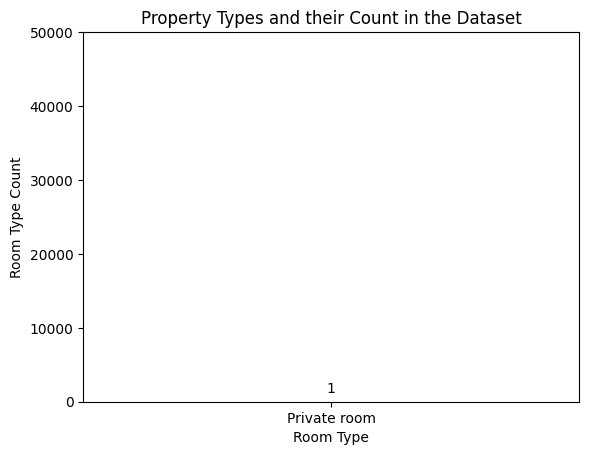

In [ ]:
#Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels=property_types.loc[:,"count"], padding=4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their Count in the Dataset');


The Airbnb open dataset in this case reveals only a single property type. The available entry corresponds to:

Private room (1 occurrence)

Notably, the bar chart reflects this limited scope, showing only “Private room” as the sole category represented in the dataset.














**Which neighborhood group has the highest number of listings?**


In [ ]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,1


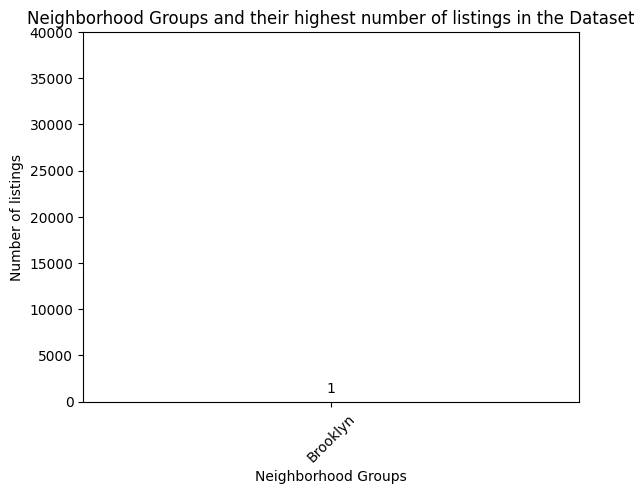

In [ ]:
#Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,"count"], padding=4);
plt.ylim([0, 40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of listings');
plt.xticks(rotation=45);
plt.title('Neighborhood Groups and their highest number of listings in the Dataset');

In [ ]:
hood_group = df['neighbourhood group'].value_counts().to_frame(name="count")
print(hood_group)


                     count
neighbourhood group       
Brooklyn                 1


The dataset contains only one neighbourhood group, namely Brooklyn. According to the bar chart, Brooklyn accounts for the entirety of the listings in the dataset, with a total of 1 occurrence

**Which neighborhoods group have the highest average prices for Airbnb listings?**

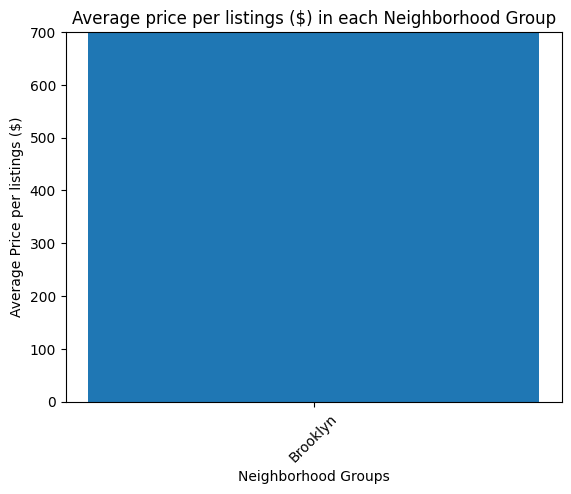

In [ ]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, "price_$"], 2), label_type='edge', padding=4);
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation=45);
plt.title('Average price per listings ($) in each Neighborhood Group');

In [ ]:
print(avg_price)


                     price_$
neighbourhood group         
Brooklyn               702.0


Among the neighbourhood groups in the dataset, only Brooklyn is represented. The average listing price for Brooklyn stands at 702.00 USD, making it the sole contributor to the bar chart.

**Is there a relationship between the Construction year of property and price?**


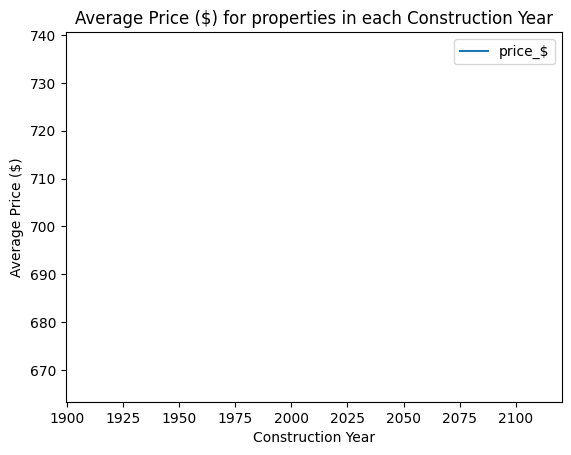

In [ ]:
#Is there a relationship between the Construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for properties in each Construction Year');

In [ ]:
print(df['Construction year'].unique())


[2010]


In [ ]:
print(df[['Construction year','price_$']])


       Construction year  price_$
11114               2010    702.0


The dataset reveals properties from only one construction year, 2010. The average listing price for this year is 702.0 USD. Consequently, the chart reflects a single value, with no visible trend across years.

**Who are the top 10 hosts by calculated host listing count?**

From the numerous hosts in the dataset, we will see the 10 hosts with the highest calculated host count.

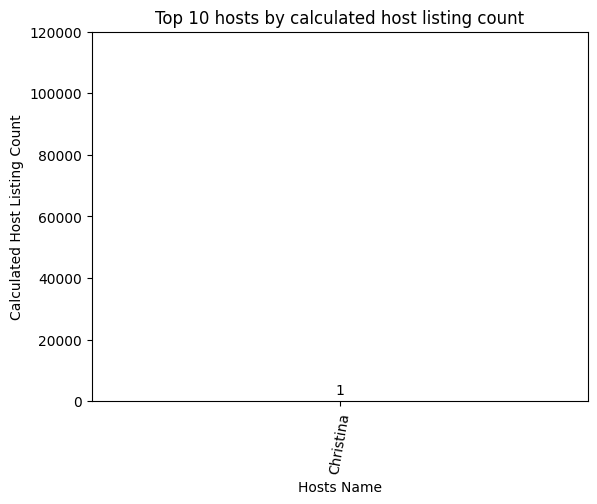

In [ ]:
#Who are the top 10 hosts by calculated host listing count?
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame();
hosts_bar=plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, label=hosts.loc[:,"calculated host listings count"], label_type='edge', padding=3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listing Count');
plt.xticks(rotation=80);
plt.ylim([0, 120000]);
plt.title('Top 10 hosts by calculated host listing count');

In [ ]:
print(df[['host name','calculated host listings count']])


       host name  calculated host listings count
11114  Christina                             1.0


The bar chart above illustrates the top hosts based on the calculated listing count. In this dataset, only one host is represented:


*   Christina, with 1 listing.


As the dataset contains just a single record, no further hosts appear in the ranking.

**Are hosts with verified identities more likely to receive positive reviews?**



In [ ]:
#Are hosts with verified identities more likely to receive positive reviews
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame();
review

,review rate number
host_identity_verified,
verified,1.0


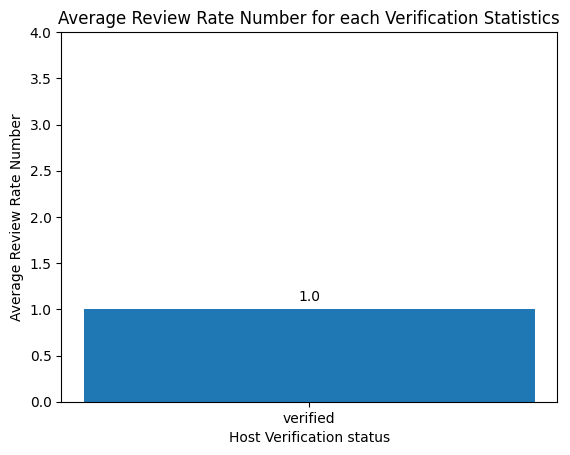

In [ ]:
review_bar=plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding=4);
plt.ylim([0, 4]);
plt.xlabel('Host Verification status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Verification Statistics');

In [ ]:
print(df[['host name','host_identity_verified','review rate number']])


       host name host_identity_verified  review rate number
11114  Christina               verified                 1.0


The bar chart above illustrates the average review rate by host verification status. In this dataset, only verified hosts are represented, with an average review rate number of 1.0. No data is available for unconfirmed hosts, resulting in a single-bar distribution.

**Is there a correlation between the price of a listing and its service fee?**



In [ ]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(nan)

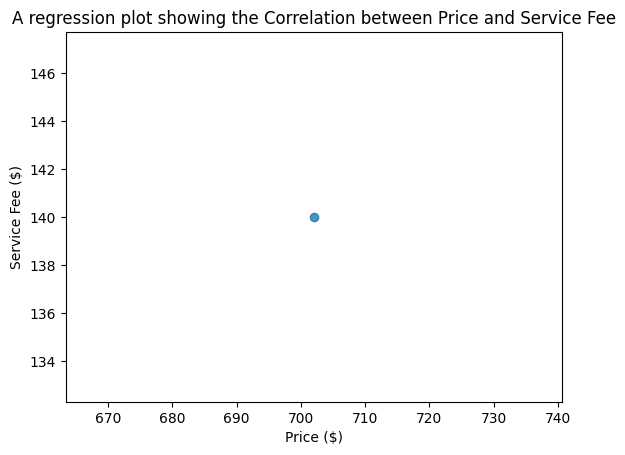

In [ ]:
sns.regplot(df, x='price_$', y='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A regression plot showing the Correlation between Price and Service Fee');

The regression plot illustrates the relationship between listing price and service fee. In this dataset, only a single observation is available, with a price of 702.0 USD and its corresponding service fee. As a result, the plot contains only one point, and no meaningful correlation can be determined between the two variables.

**What is the average review rate number (eg., stars) for listings, and does it vary based on the neighborhood group and room type?**



In [ ]:
#What is the average review rate number (eg., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

,,review rate number
neighbourhood group,room type,
Brooklyn,Private room,1.0


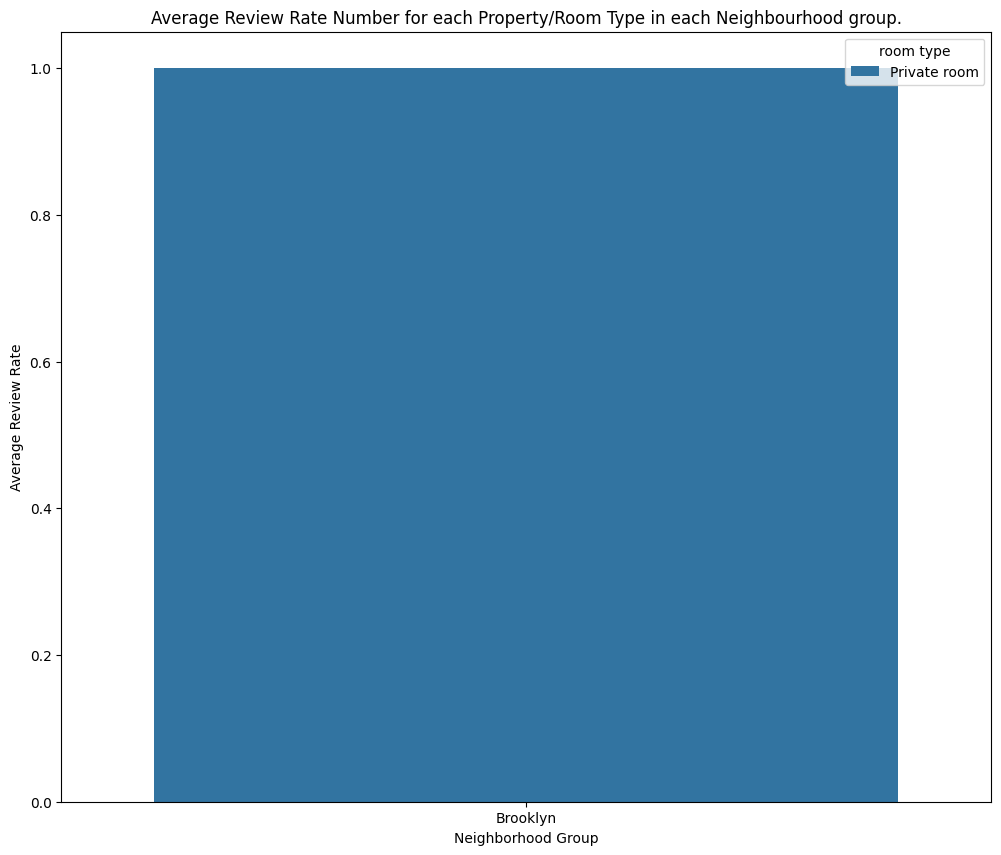

In [ ]:
plt.figure(figsize=[12, 10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate Number for each Property/Room Type in each Neighbourhood group.');

Private rooms exhibit an average review rate of 1.0 within the only neighbourhood group represented in the dataset, Brooklyn. No other property types or neighbourhood groups are available for comparison.

**Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**


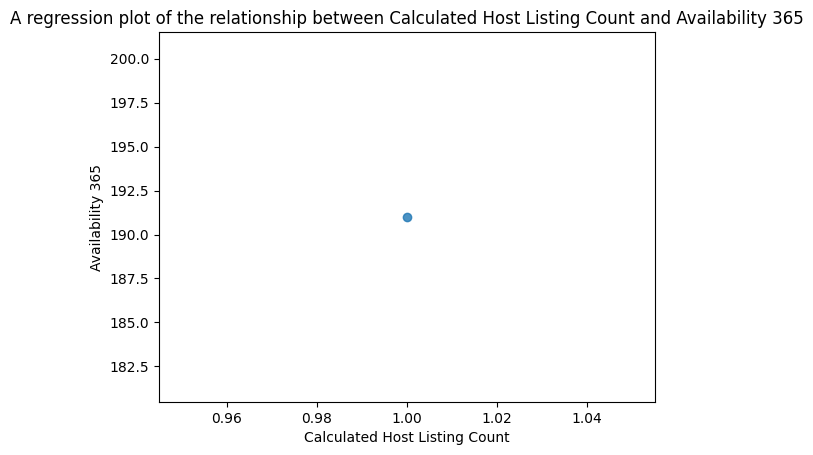

In [ ]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x='calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listing Count');
plt.ylabel('Availability 365');
plt.title('A regression plot of the relationship between Calculated Host Listing Count and Availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(nan)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 cannot be determined in this dataset, as only a single record is available. Consequently, the regression plot displays just one point, offering no meaningful insight into the relationship between host listing count and yearly availability.

**Conclusion**

In conclusion, this project has demonstrated the process of cleaning, exploring, and visualizing the New York City Airbnb dataset. While the available data was limited to a single record, it still allowed practice in applying data wrangling, exploratory data analysis (EDA), and visualization techniques.

Key findings from this dataset include the presence of only one room type (Private room), situated in a single neighbourhood group (Brooklyn), with a construction year of 2010, an average price of 702.0 USD, and a review rate of 1.0. The sole host, Christina, maintained one listing, with verified host status. Due to the dataset’s scope, no meaningful comparisons or correlations could be drawn between variables such as service fee and price, host count and availability, or property types across neighbourhood groups.

Despite its limitations, this project provided valuable hands-on experience in working with real-world data: handling missing values, transforming datatypes, visualizing distributions, and generating insights. With a larger dataset, the same methods could be expanded to uncover trends in pricing, host behavior, and review dynamics, and could further support predictive modeling for demand and pricing strategies.